# 5월 9일 
## 데이터 분석

### Matplotlib
#### Axis
- 그래프 원하는 개수 만들기
- x축 y축 간격 정하기
- x축 y축 라벨 붙이기

<ipython-input-5-fb71583779cf>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(["A","B","C","D","E"])


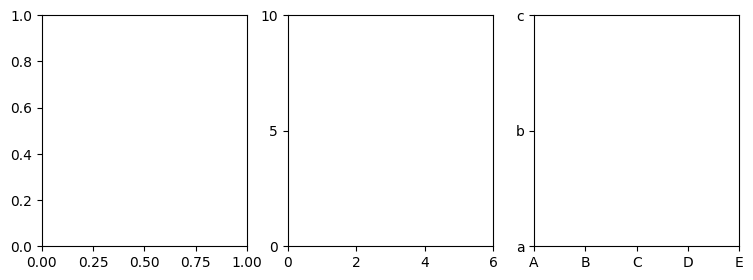

In [5]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,3, figsize=(9,3))   # 가로9cm/ 세로 3cm

axs[1].set_xticks([0,2,4,6])
axs[1].set_yticks([0,5,10])

axs[2].set_xticklabels(["A","B","C","D","E"])
axs[2].set_yticks([0,1,2])
axs[2].set_yticklabels(['a','b','c'])


plt.show()


### (참고사항)

데이터분석 경진대회?

- 카글
- 데이콘
- k 디지털 트레이닝 해커톤(아이디어 제공만 하는 경진대회)
- 빅데이터 분석 대회 검색해서 해보기.

### 사이킷런으로 배우는 머신러닝(복습)

### 코드 짜기 복습
### Scikit - learn
#### 붓꽃 품종 예측하기

In [6]:
import sklearn
print(sklearn.__version__)

1.2.2


- 데이터 적재

In [7]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'],
                                                    test_size=0.2,
                                                    random_state = 2023)

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [10]:
print('X_train 크키 : {}'.format(X_train.shape))
print('y_train 크키 : {}'.format(y_train.shape))

X_train 크키 : (120, 4)
y_train 크키 : (120,)


- k-최근접 이웃 알고리즘(복습)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

## 머신러닝 - 회귀


## 회귀분석

- 중요 이해 잘 해야 함. 뒤에 다 연결됨
- y 타겟, x는 데이터
- 

- 미분 중요. 모든 머신러닝은 미분으로 분석
- 미분으로 값이 0이 되었을때가 실제값과 관측치의 오차가 제일 적은 순간
- 오차들을 제곱을 한 뒤 미분을 해서 차이가 제일 적은 값을 찾는다
  - 제곱의 장점 :
  - 에러를 더 크게 해서 보여줌
  - 나중에 미분사용할떄 도움

미분을 해야 하는 이유 : 머신러닝 알고리즘은 전부 미분이 들어감

### 회귀분석
 Gradient Descent

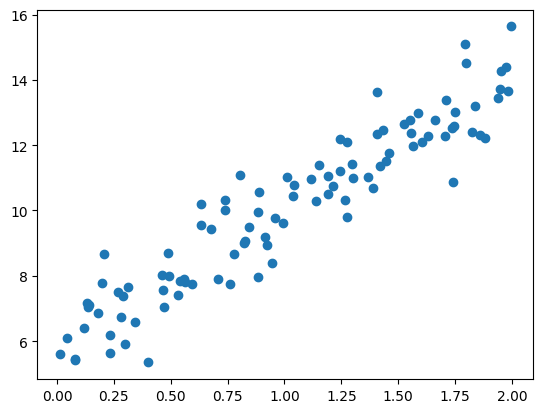

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4x+6의 식을 근사(w1 = 4, w = 0.6). random. 값은 noise를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

# X,y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)


In [2]:
# w1과 w0fmf djqepdlxm gkf w1_update, w0_update를 반환 (미리 값 들어갈 빈칸을 만들어놓는거)

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)   #y = w_0 + w1 * y1

  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0   # np.matmul 써도 되지만 어차피 벡터 계산이기 때문에 dot을 씀

  # y = ax + b -->> np.dot(X, w1, T)
  diff = y - y_pred  # error function = (실제값 = 예측값)


  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성.
  w0_factors = np.ones((N,1))   # 초기값 ones로 셋팅 N 크기 만큼 받아들이고


  # w1과 w0를 업데이트 할 w1_update 와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))  # N은 평균을 뜻함. error ftn : mse(mean square error)
  #.summation i^n(y - y_hat)(-x_i)
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))   #summation_i^n(y-y_hat)(-x_1)

  return w1_update, w0_update  #W_0, W_1 update

In [6]:
# 입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.

def gradient_descent_steps(X,y,iters=10000):
  # w1과 w0을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weioght_update() 를 호출하여 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    # learning_rate : hyperparameter (사람이 정하는 파라미터. 정해져있지 않음)
    # 보통 10^(-2) ~ 10^(-6) 사이로 정함. 절대적으로 정해져있지는 않음.
    w1 = w1 - w1_update          #w1(왼쪽에 있는것은) -> new,   w1(오른쪽에 있는것은) -> old  로 보자.
    # w1_update = gradient descent 방법
    # new = old-update(update = 0 -->> new = old)             # 최적의 값을 찾음
    w0 = w0 - w0_update
  return w1, w0 


In [7]:
def get_cost(u, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  print(cost)
  return cost

In [8]:
w1,w0 = gradient_descent_steps(X, y, iters = 1000)  # 1000번 반복하라
# 최적의 값을 뽑고 그때의 cost값을 출력
print('w1:{0:0.3f} w0:{1:3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("Gradient Descent Total cost : {0:.4f}".format(get_cost(y, y_pred)))

w1:4.148 w0:5.840258
0.7298946035119023
Gradient Descent Total cost : 0.7299


## Sklearn 데이터셋 활용

**Bulid-in dataset**


- load_boston: 보스톤 집값 데이터
- load_iris: 아이리스 붓꽃 데이터
- load_diabetes: 당뇨병 환자 데이터
- load_digits: 손글씨 데이터
- load_linnerud: multi-output regression 용 데이터
- load_wine: 와인 데이터
- load_breast_cancer: 위스콘신 유방암 환자 데이터

### Sklearn Linear Regression Tutorial with Boston House Dataset

- Boston house dataset은 1.0 버전 이후부터는 사라짐. 버전 다운그레이드를 해줘야 함. 


In [9]:
# 데이터 패키지 사용하기 위해서 사이킷 버전을 낮춰야함..ㅋ
# !pip uninstall scikit-learn
!pip install scikit-learn==1.0.2

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 28.0 MB/s eta 0:00:00


In [10]:
import sklearn
print(sklearn.__version__)

1.0.2


In [13]:
import numpy as np
import pandas as pd
#Visualization Libraries

import seaborn as sns
#seaborn : 그래프를 통계적으로 그리는 패키지.

import matplotlib.pyplot as plt

# imoprt package
#->함수를 몽땅 가지고 오는 것

#from package imoprt module
# 패키지안에서 특정함수를 딸랑만 가지고 오는것.

from sklearn import datasets           # from sklearn import~: 사이킷 런의 속성중 ~을 가져와라
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
#To plot the graph embedded in the note book
%matplotlib inline


In [14]:
#loading the dataset direclty from sklearn
#import sklearn
#boston = sklearn.datasets.load_boston()
boston = datasets.load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [15]:
print(type(boston))
print('\n') #엔터쳐주세요.
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n') #엔터키를 치시오. print('\t') -> tab으로 띄어 주세요
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
# 데이터들을 데이터프레임으로 바꿔야 그래프로 그려짐.
# 데이터 프레임으로 바꾸기

bos = pd.DataFrame(boston.data, columns = boston.feature_names)     # 행과 열을 접근하기 위해서
bos['PRICE'] = boston.target
print(bos.head())    # 위에서부터 순서대로 () 개수만큼 보여줘 -> default = 다섯개. 고로 다섯개 보임. 
print(bos.tail())    # 밑에서부터 순서대로 () 개수만큼 보여줘 -> 여기에선 다섯개(디폴트값)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3

In [27]:
bos.isnull().sum() #결측치 확인
#bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [28]:
bos.describe() # 요약통계량

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


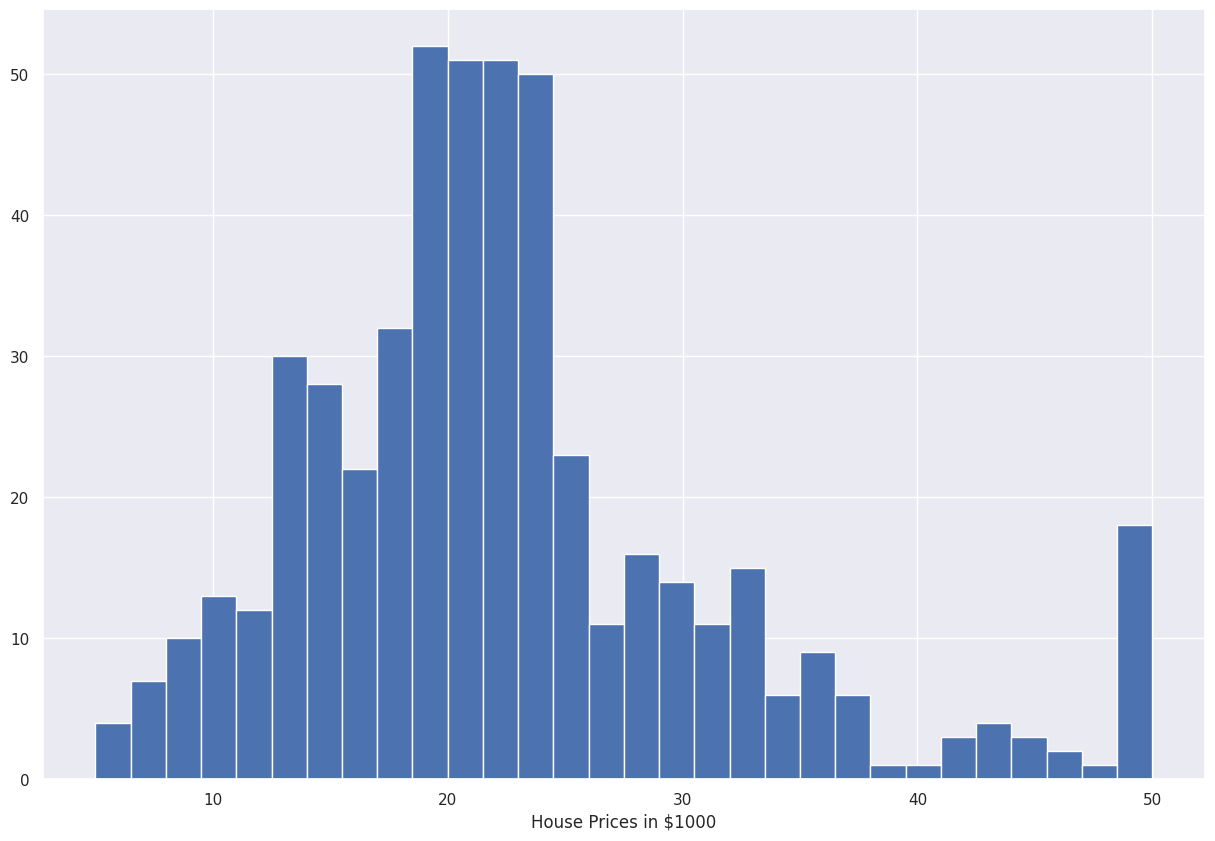

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize' : (15,10)})  # Price에 대해 그림을 그림
#figure.figsize : 크기를 어떻게 만들것인가
plt.hist(bos['PRICE'],bins=30)   # .hist : 히스토그램을 쓰겠다/ .bins : 막대기가 몇개냐?
plt.xlabel('House Prices in $1000')  # x축
plt.show()  # 그림그려줘

<Axes: >

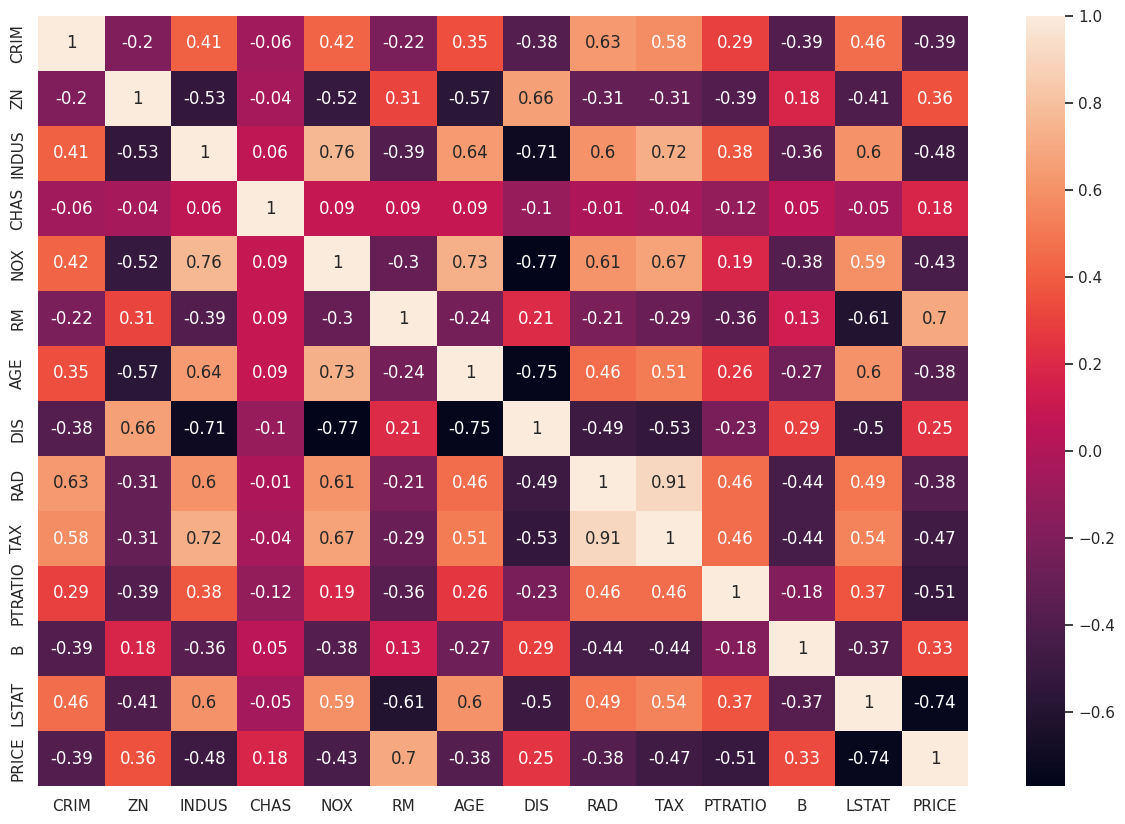

In [31]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
# bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos.corr().round(2) #상관계수를 계산해줘.
sns.heatmap(data=correlation_matrix, annot=True) 
# heatmap 관계가 높다는 검은색, 밝은색 -> 진한 색깔이면 관계가 높다. 
# annot -> 계산한값을 그림에 그려줘.


# 다중공산성 문제를 확인한것(왜냐하면 타겟은 빠져있기 때문에.)
## 변수가 독립적이어서 개별적으로 분석 가능한게 좋으나, 다른 변수와 관계가 생기면 오차가 커짐.

In [33]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

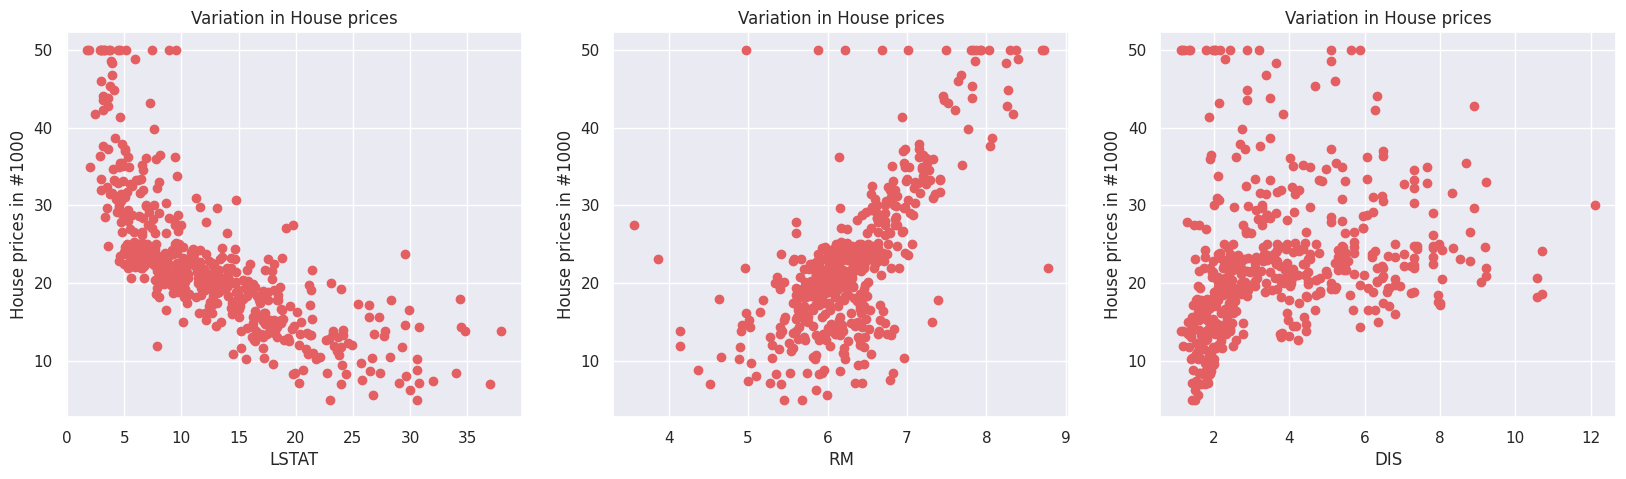

In [34]:
plt.figure(figsize = (20,5))
features = ["LSTAT", "RM", "DIS"]
target = bos["PRICE"]

## subplot 으로 그리기

for i,col in enumerate(features):
  plt.subplot(1,len(features), i+1)      
  ## subplot : subplots와 다름.subplots는 미리 만들어줘야하는데, 이건 확장가능성이 있음. 피쳐 넣으면 하나씩 늘어남.
  x = bos[col]
  y = target
  plt.scatter(x,y,marker = 'o', color = '#e35f62')
  plt.title('Variation in House prices')
  plt.xlabel(col)
  plt.ylabel('House prices in #1000')

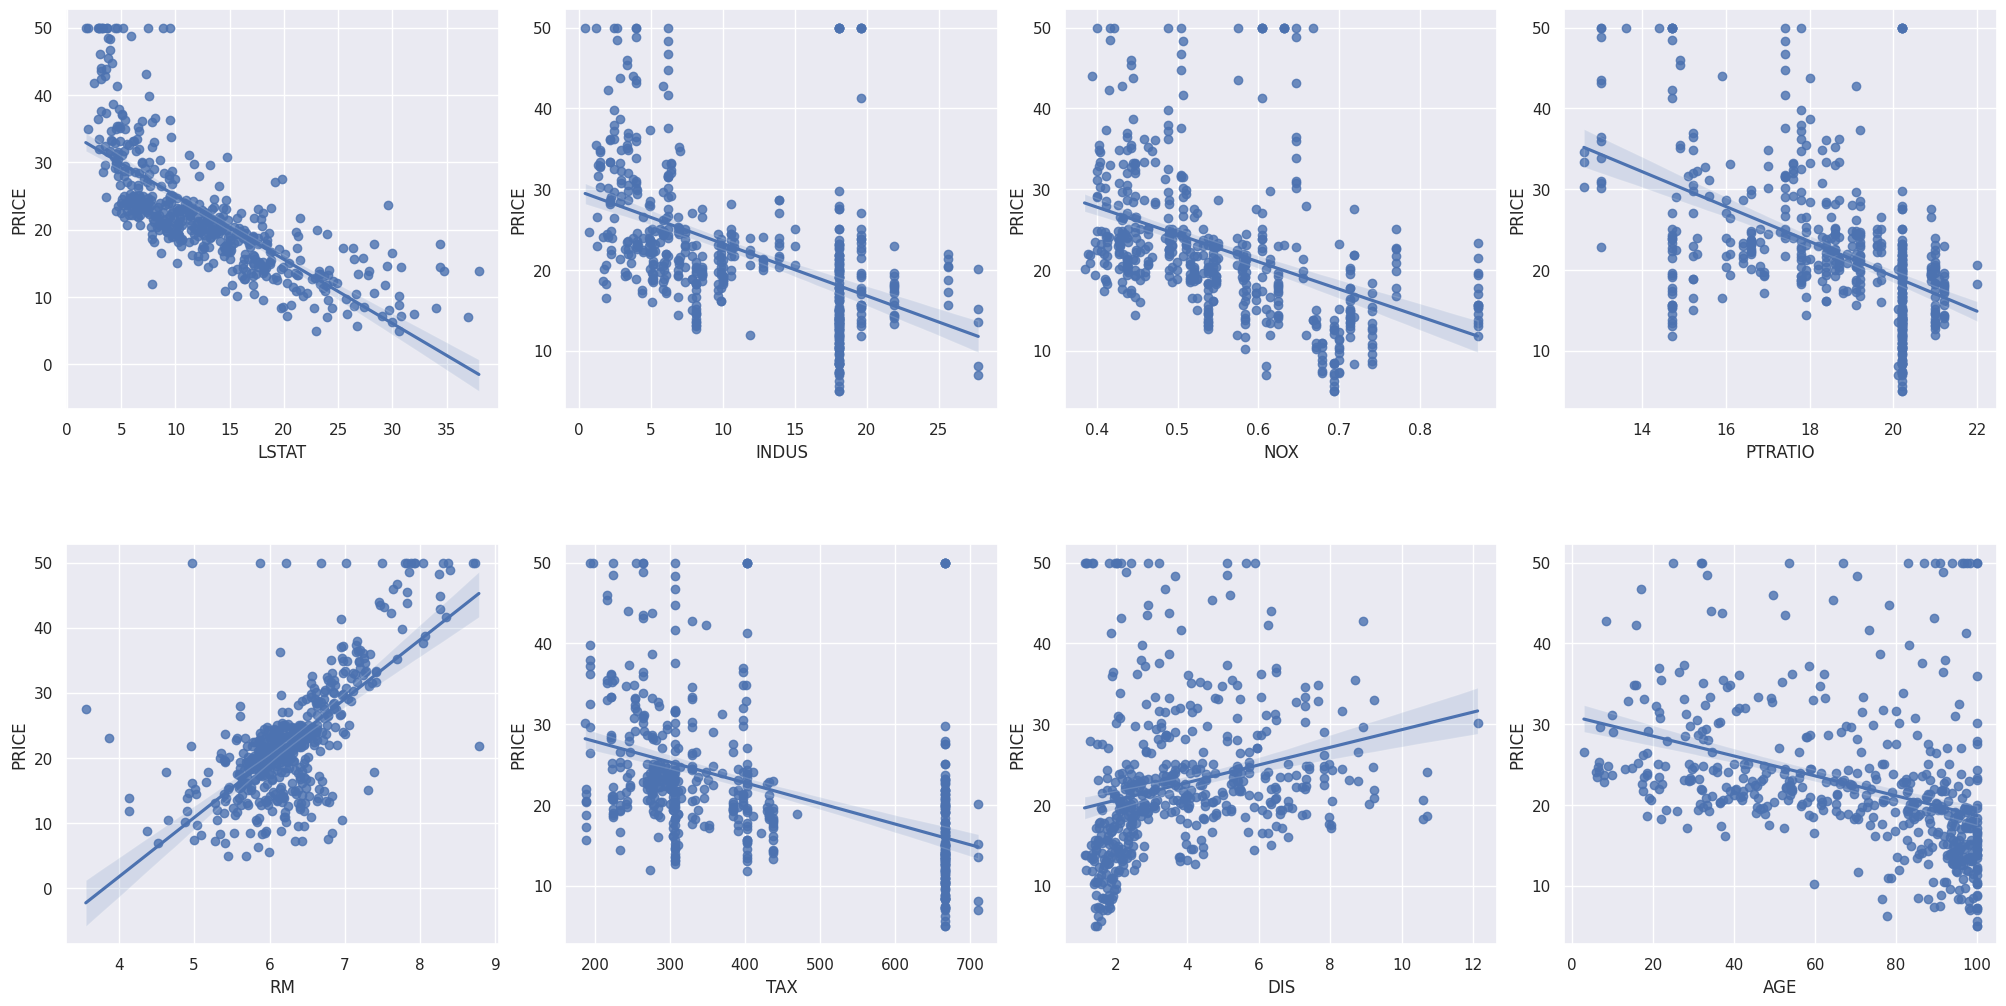

In [37]:
## subplots 로 그려보기

columns_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'] # 이건 벡터
x = bos.loc[:,columns_sels]
y = bos['PRICE']

fig,axes = plt.subplots(ncols = 4, nrows = 2, figsize = (20,10)) # 이건 행렬
index = 0
axes = axes.flatten()  # 평평하게 펴 줘야 
for i,k in enumerate(columns_sels):
  sns.regplot(y=y, x=x[k], ax = axes[i]) # 그림을 그린 다음 행과 열을 만들 수 있다.
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [39]:
bos.RM.shape

(506,)

In [41]:
bos.PRICE.shape

(506,)

In [46]:
# 위 두개는 벡터. 행렬로 바꿔줘야 함
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y_price, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


### Sklearn의 Linear regression 클래스

**input parameter**
- fit_intercept : 불 값으로, default = True. Intercept(절편) 값을 계산할 것인지 말지를 지정함. 만일 False로 지정하면 Intercept가 사용되지 않고 0으로 지정됨.

- normalize : 불 값으로, 디폴트는 False임. fit_intercept가 False 인 경우에는 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 함


**Features**

- coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피쳐 개수)

- intercept_ : intercept 값


#다중 공성선 문제(multicollinearity problem)

## 참고 : 선형 회귀분석의 4가지 기본가정(https://kkokkilkon.tistory.com/175)

선형회귀의 가정은 4가지 정도가 있다.

1. 독립변수와 종속변수 간의 선형적인 관계를 가정한다.

2. 오차항은 정규분포를 따른다는 가정이다. (Normality)

3. 오차항은 등분산성을 가정한다.(Homoscedasticity)

4.  공분산성이 없다는 가정이다. (no multicollinearity) 

모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상을 말함.

-> 어처구니 없는 해석을 하게 만듬


- 피쳐 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중 공선성(Multi-collinearity) 


- RMSE(Root Mean Squared Error) :MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다  더 커지는 특성이 있으므로 MSE에 루트를 씌움.


## $R^2 = {\dfrac {예측값 ~~~ Variance} {실제값~~~Varivance} } $


In [50]:
# 실습

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train 에 대한 평가
reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)

y_train_predict = reg_1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_1.score(X_train, y_train), 2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

#  스코어가 0.43이면 찍는것보다 못한 수준. 왜? 변수가 X_room 밖에 없어서.
# 그래서 

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [51]:
# model evaluation for test set
# 이렇게 하나 더 넣어주면 점수가 올라감

y_pred = reg_1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_1.score(X_test, y_test),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.895963186952216
R2 score is 0.69




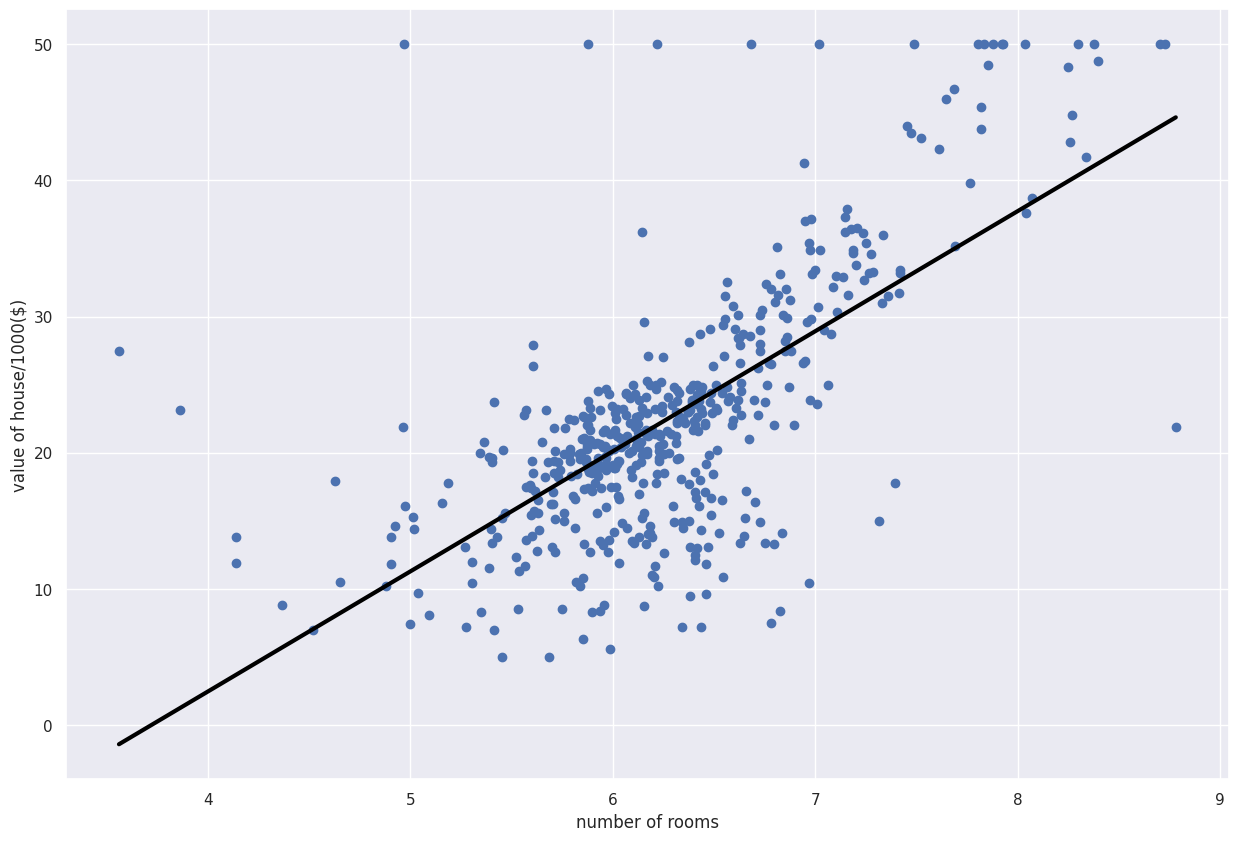

In [52]:
# 이제 그림을 그려보자

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

# 변수 두개밖에 안넣었음 -> 어쩐지 그림이 이상함.
# 이제 모든 변수를 넣어봅시다

In [53]:
# 이제 모든 변수를 넣어보자
# 타겟은 프라이스. 고로 값을 학습시키면 안됨. 

X = bos.drop('PRICE', axis = 1)  #프라이스 드랍함. 
# (참고) inplace = True 하면 보스프라이스 전부 드랍됨. 근데 여기서는 필요 엾음
y = bos['PRICE']


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
# 나누는 작업



In [59]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [60]:
# model evaluation for training set
# 트레이닝 시키기

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [61]:
# model evaluation for test set
# 테스트 돌려보기

y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = round(reg_all.score(X_test, y_test),2)

print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 4.928602182665333
R2 score is 0.67




## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target array는 주택가격
# 이를 컬럼 PRICE로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기: ', bostonDF.shape)
bostonDF

Boston 데이터셋 크기:  (506, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- CRIM : 지역별 점외 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- NDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
-  MEDV : 본인 소유의 주택가격(중앙값)

In [ ]:
# 주택가격 예측하기. 뭘 뭔저 해야할까.

# 모양 확인하기
# 데이터를 데이터 프레임으로 변환하기.
# - df DataFrame 써서 변환
# 벡터에서 행렬변환
# - reshape
# 열 가져오기
# - columns
# 그래프로 그리기
# 산점도
# - scatter


# 아주 다 틀리는구만


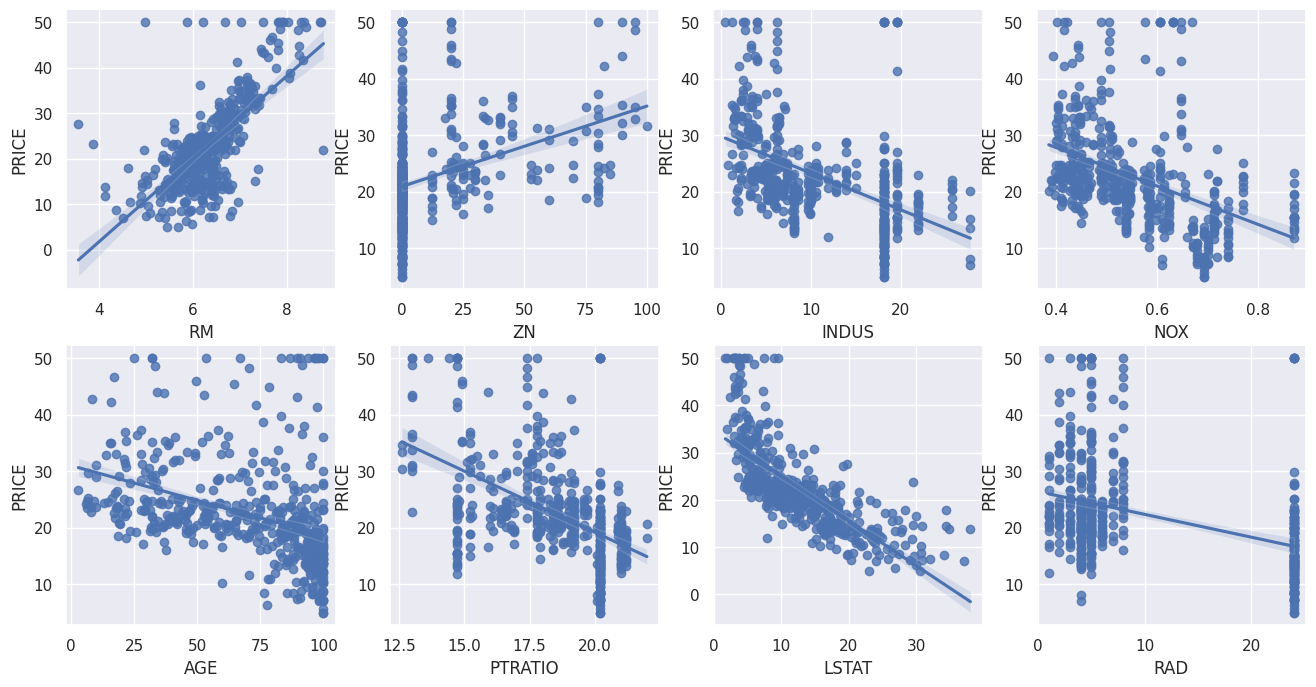

In [64]:
# 데이터 프레임을 바탕으로 산점도 그래프 그려보기

fig,axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 앞에서와는 다르게 row와 col를 조절함. 
    # 앞에서는 플래튼 썼으나 여기선 없음.
    # 잘라달라는 말이 없어서 펼쳐논거임.
    # features 8개
    # 왜냐면 4개씩 잘라달라는 명령어가 들어가서 알아서 4개에서 짤려서 밑으로 내려감.
    #seaborn의 regplot을 이용해 산점도와 선형 회귀 직성을 함께 표현S
    sns.regplot(x=feature, y='PRICE', data= bostonDF,ax = axs[row][col])


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

#linear Regression OLS(ordinary Least Square(OLS) method)
#error function을 gradient method로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [68]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_,1))

절편 값: 40.995595172164485
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [69]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 
# index가 컬럼이다 (컬럼이 열로 쓰이지 않고 횡으로 쓰였다고 보면 됨.)
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64